# DataSet
<p>I dowwnload a dataset from kaggle</p>
<h3>About dataset<h3>
<ol>
<li>id = unique id of news article</li>
<li>title = Title of news article</li>
<li>author = Author of news article</li>
<li>text = Text of news article</li>
<li>lable = To mark news can be a real or fake</li>
    <ol>
     <li> 1 --> Fake</li>
     <li> 0 --> Real </li>
    </ol>
<li>Our ouput is Binary nominal categorical ( only two outputs can be a possible)</li>
<li>Our project is about Classification (Type Supervised Machine Learning)</li>
</ol>

## Import required modules

In [2]:
import numpy as np
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [3]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
# Printing words in English
print(stopwords.words('English'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

## Data Pre-Processing

In [5]:
# Loding News Data
News_data = pd.read_csv('train.csv')

In [6]:
# shape size length of dataset
print('DataSet Shape : ',News_data.shape)     # return number rows and colums  in dataset
print('DataSet Size : ',News_data.size)       # return multiplication of rows*colums mean total entries in dataset exist
print('DataSet Length : ',len(News_data))     # return number of rows in dataset

DataSet Shape :  (20800, 5)
DataSet Size :  104000
DataSet Length :  20800


In [7]:
# Take a look at dataset on top bottom random
# head() and tail by default return 5 rows  but you can also pass a desired parameter
# sample() by default return a random single row but here also you can pass a parameter

# To take a look at top of data
News_data.head(3)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1


In [8]:
# To take a look at bottom of data
News_data.tail(3)

,id,title,author,text,label
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1
20799,20799,What Keeps the F-35 Alive,David Swanson,"David Swanson is an author, activist, journa...",1


In [9]:
# To take a random look at data
News_data.sample(2)

,id,title,author,text,label
14718,14718,Hillary Clinton accused of stealing furniture ...,NaN,Email \nHillary Clinton swiped State Departmen...,1
1391,1391,Senate Republicans Open Fight Over Obama Healt...,Thomas Kaplan and Glenn Thrush,WASHINGTON — Congress opened for battle ove...,0


In [10]:
# Count number of null values in data
News_data.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [11]:
# Calulate mean of null values
null_values_mean = (News_data.isnull().sum()) / (News_data.isnull().count()) 
null_values_mean

id        0.000000
title     0.026827
author    0.094087
text      0.001875
label     0.000000
dtype: float64

In [12]:
# Percentage of null values is neglectable but for better performance We fill this
# id or label don't contain null values so only string data columns contain null values
# so we will replace these with empty string
# fillna() take a arguement and it is out-place method not in-place

News_data = News_data.fillna('')

In [13]:
# Now cheeck null values sum
News_data.isnull().sum()

id        0
title     0
author    0
text      0
label     0
dtype: int64

In [14]:
# merge author and text using a + operator
News_data['content'] = News_data['author']+''+News_data['text']
News_data['content']

0        Darrell LucusHouse Dem Aide: We Didn’t Even Se...
1        Daniel J. FlynnEver get the feeling your life ...
2        Consortiumnews.comWhy the Truth Might Get You ...
3        Jessica PurkissVideos 15 Civilians Killed In S...
4        Howard PortnoyPrint \nAn Iranian woman has bee...
                               ...                        
20795    Jerome HudsonRapper T. I. unloaded on black ce...
20796    Benjamin HoffmanWhen the Green Bay Packers los...
20797    Michael J. de la Merced and Rachel AbramsThe M...
20798    Alex AnsaryNATO, Russia To Hold Parallel Exerc...
20799    David Swanson  David Swanson is an author, act...
Name: content, Length: 20800, dtype: object

In [15]:
# merge author and text
News_data['content'] = pd.concat([News_data['author'] , News_data['title']],axis=1).apply(lambda row: ''.join(row.values.astype(str)), axis=1)
News_data['content']

0        Darrell LucusHouse Dem Aide: We Didn’t Even Se...
1        Daniel J. FlynnFLYNN: Hillary Clinton, Big Wom...
2        Consortiumnews.comWhy the Truth Might Get You ...
3        Jessica Purkiss15 Civilians Killed In Single U...
4        Howard PortnoyIranian woman jailed for fiction...
                               ...                        
20795    Jerome HudsonRapper T.I.: Trump a ’Poster Chil...
20796    Benjamin HoffmanN.F.L. Playoffs: Schedule, Mat...
20797    Michael J. de la Merced and Rachel AbramsMacy’...
20798    Alex AnsaryNATO, Russia To Hold Parallel Exerc...
20799               David SwansonWhat Keeps the F-35 Alive
Name: content, Length: 20800, dtype: object

In [16]:
# Separating the label fron dataset
X = News_data.drop(columns='label',axis=1)
Y = News_data['label']


In [17]:
X.head()

,id,title,author,text,content
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell LucusHouse Dem Aide: We Didn’t Even Se...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,"Daniel J. FlynnFLYNN: Hillary Clinton, Big Wom..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",Consortiumnews.comWhy the Truth Might Get You ...
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,Jessica Purkiss15 Civilians Killed In Single U...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,Howard PortnoyIranian woman jailed for fiction...


In [18]:
Y.head()

0    1
1    0
2    1
3    1
4    1
Name: label, dtype: int64

## Steaming
<p>Steaming is the process of reducing a word to its root word.</p>
Example: running, runner, ran --> run

In [19]:
# Create a instance/object of PorterStemmer
stem_port = PorterStemmer()

In [20]:
def stemming(content):
    stemmed_content = re.sub('[^a-zA-Z]',' ',content)
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [stem_port.stem(word) for word in stemmed_content if not word in stopwords.words('English')]
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content
    

In [21]:
News_data['content'] = News_data['content'].apply(stemming)

In [22]:
# Here X contains only author and title names
X = News_data['content'].values
print(X)

['darrel lucushous dem aid even see comey letter jason chaffetz tweet'
 'daniel j flynnflynn hillari clinton big woman campu breitbart'
 'consortiumnew comwhi truth might get fire' ...
 'michael j de la merc rachel abramsmaci said receiv takeov approach hudson bay new york time'
 'alex ansarynato russia hold parallel exercis balkan'
 'david swansonwhat keep f aliv']


In [23]:
Y = News_data['label'].values
print(Y)

[1 0 1 ... 0 1 1]


### Convert text data to numerical data

In [24]:
vectorizer = TfidfVectorizer()

In [25]:
vectorizer.fit(X)
X = vectorizer.transform(X)
X

<20800x28419 sparse matrix of type '<class 'numpy.float64'>'
	with 198373 stored elements in Compressed Sparse Row format>

### Split the data into Training and Testing data sets

In [26]:
X_train , X_test , Y_train , Y_test = train_test_split(X,Y , test_size=0.2, stratify=Y, random_state = 42)

In [27]:
lg_model = LogisticRegression()

In [28]:
lg_model.fit(X_train , Y_train)

LogisticRegression()

## Evaluation
### Accuracy Score

In [29]:
# Accuracy Score on test data set

X_pred = lg_model.predict(X_test)

In [30]:
X_pred

array([0, 0, 1, ..., 0, 1, 0], dtype=int64)

In [31]:
test_accuracy_score = accuracy_score(X_pred , Y_test)
print("{:.3f}".format(test_accuracy_score))

0.950


In [38]:
# Accuracy Score on Training data set
Y_pred = lg_model.predict(X_train)
Y_pred

array([0, 0, 1, ..., 0, 1, 1], dtype=int64)

In [39]:
train_accuracy_score = accuracy_score(Y_pred , Y_train , normalize=False)
print("{:.3f}".format(train_accuracy_score))

16184.000


## Predictive System

In [138]:
X_new = X_test[0]

prediction = lg_model.predict(X_new)

if prediction[0] ==0:
    print('News is Real')
else:
    print('News is fake')

News is Real


## Visualization

### plotting for test data

In [33]:
import matplotlib.pyplot as plt
import seaborn as sn
from collections import Counter

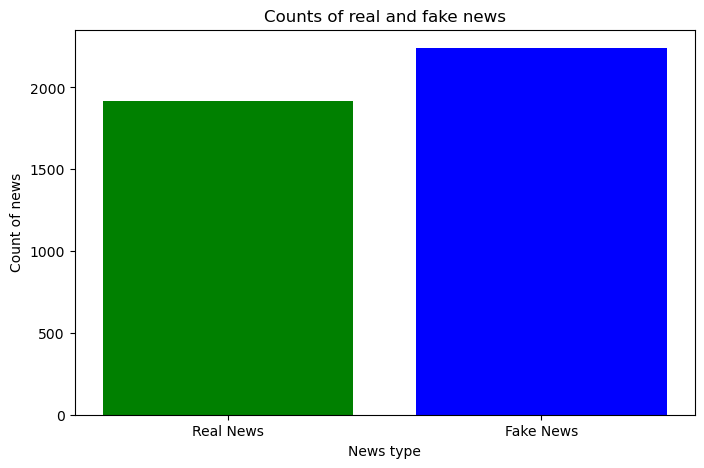

In [37]:
counter = Counter(X_pred)
counts  = [counter[0] , counter[1]]
labels = ['Real News','Fake News']

plt.figure(figsize=(8,5))
plt.bar(labels , counts , color =['green','blue'])

plt.title('Counts of real and fake news')
plt.ylabel('Count of news')
plt.xlabel('News type')
plt.show()

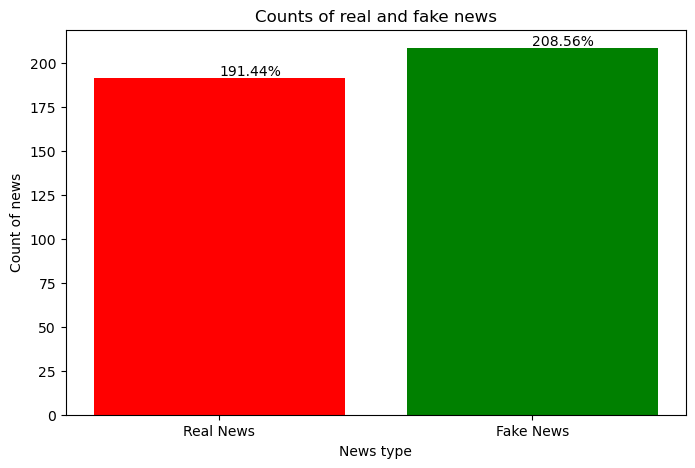

In [42]:
total = len(X_pred)
percentages = [(count/total)*100 for count in counts]
plt.figure(figsize=(8,5))
bars = plt.bar(labels , percentages , color =['red','green'])

plt.title('Counts of real and fake news')
plt.ylabel('Count of news')
plt.xlabel('News type')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval:.2f}%', va='bottom')  
plt.show()

### plot for train data

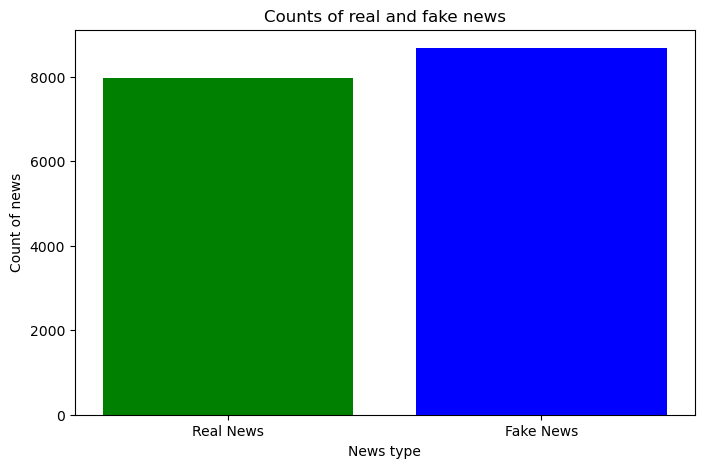

In [40]:
counter = Counter(Y_pred)
counts  = [counter[0] , counter[1]]
labels = ['Real News','Fake News']

plt.figure(figsize=(8,5))
plt.bar(labels , counts , color =['green','blue'])

plt.title('Counts of real and fake news')
plt.ylabel('Count of news')
plt.xlabel('News type')
plt.show()

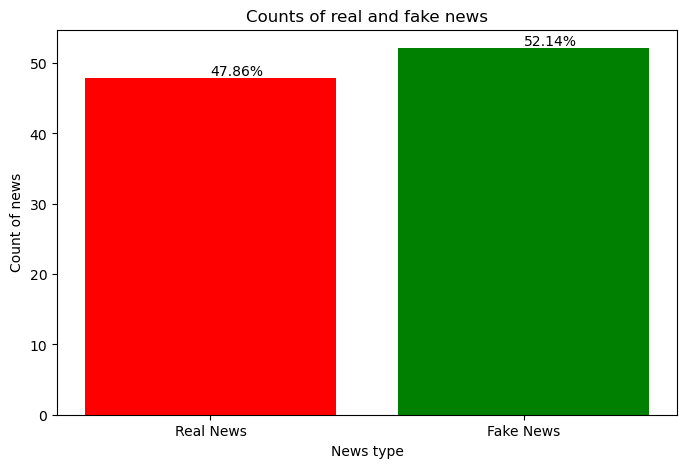

In [43]:
total = len(Y_pred)
percentages = [(count/total)*100 for count in counts]
plt.figure(figsize=(8,5))
bars = plt.bar(labels , percentages , color =['red','green'])

plt.title('Counts of real and fake news')
plt.ylabel('Count of news')
plt.xlabel('News type')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval:.2f}%', va='bottom')  
plt.show()